## Install Packages

In [3]:
!pip install ucimlrepo
# !pip install pandas
# !pip install scikit-learn
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib

## Import Libraries

In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Assign Independant and dependant variables

In [5]:
adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets

In [6]:
X_df = pd.DataFrame(data=X, columns=adult.feature_names)
y_df = pd.DataFrame(y)

df = pd.concat([X_df, y_df], axis=1)

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Data Exploration

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [11]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [13]:
df['education'].value_counts().sort_values()

Preschool          83
1st-4th           247
5th-6th           509
Doctorate         594
12th              657
9th               756
Prof-school       834
7th-8th           955
10th             1389
Assoc-acdm       1601
11th             1812
Assoc-voc        2061
Masters          2657
Bachelors        8025
Some-college    10878
HS-grad         15784
Name: education, dtype: int64

In [14]:
df['marital-status'].value_counts().sort_values()

Married-AF-spouse           37
Married-spouse-absent      628
Widowed                   1518
Separated                 1530
Divorced                  6633
Never-married            16117
Married-civ-spouse       22379
Name: marital-status, dtype: int64

In [15]:
df['native-country'].value_counts().sort_values()

Holand-Netherlands                1
Hungary                          19
Honduras                         20
Scotland                         21
Outlying-US(Guam-USVI-etc)       23
Yugoslavia                       23
Laos                             23
Trinadad&Tobago                  27
Cambodia                         28
Thailand                         30
Hong                             30
Ireland                          37
France                           38
Ecuador                          45
Peru                             46
Nicaragua                        49
Greece                           49
Iran                             59
Taiwan                           65
Portugal                         67
Haiti                            75
Columbia                         85
Vietnam                          86
Poland                           87
Guatemala                        88
Japan                            92
Dominican-Republic              103
Italy                       

In [16]:
df['occupation'].value_counts().sort_values()

Armed-Forces           15
Priv-house-serv       242
Protective-serv       983
Tech-support         1446
Farming-fishing      1490
?                    1843
Handlers-cleaners    2072
Transport-moving     2355
Machine-op-inspct    3022
Other-service        4923
Sales                5504
Adm-clerical         5611
Exec-managerial      6086
Craft-repair         6112
Prof-specialty       6172
Name: occupation, dtype: int64

In [17]:
df['workclass'].value_counts().sort_values()

Never-worked           10
Without-pay            21
Federal-gov          1432
Self-emp-inc         1695
?                    1836
State-gov            1981
Local-gov            3136
Self-emp-not-inc     3862
Private             33906
Name: workclass, dtype: int64

## Preprocess the data

In [11]:
print(df['income'].unique())
df['income'] = df['income'].replace({'<=50K.':'<=50K','>50K.':'>50K'})
print(df['income'].unique())

['<=50K' '>50K' '<=50K.' '>50K.']
['<=50K' '>50K']


In [19]:
df.replace('?',np.NaN,inplace=True)
print(df.columns[df.isna().any()])
df = df.drop(columns=['fnlwgt','education-num','relationship','race','capital-gain','capital-loss','sex'])

Index(['workclass', 'occupation', 'native-country'], dtype='object')


In [20]:
mode_workclass = df['workclass'].mode()[0]
df['workclass'] = df['workclass'].fillna(mode_workclass)

mode_occupation = df['occupation'].mode()[0]
df['occupation'] = df['occupation'].fillna(mode_occupation)

mode_country = df['native-country'].mode()[0]
df['native-country'] = df['native-country'].fillna(mode_country)

df = df.replace(["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th","11th", "12th"],'School', regex=True)
df = df.replace(['HS-grad','Some-college','Assoc-acdm','Assoc-voc','Prof-school'],'Higher-Education', regex=True)
df.to_csv('Preprocessed_Data.csv')

In [21]:
df

,age,workclass,education,marital-status,occupation,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,13,United-States,<=50K
2,38,Private,Higher-Education,Divorced,Handlers-cleaners,40,United-States,<=50K
3,53,Private,School,Married-civ-spouse,Handlers-cleaners,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,Divorced,Prof-specialty,36,United-States,<=50K
48838,64,Private,Higher-Education,Widowed,Prof-specialty,40,United-States,<=50K
48839,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,50,United-States,<=50K
48840,44,Private,Bachelors,Divorced,Adm-clerical,40,United-States,<=50K


### Plot Distribution by Age Group

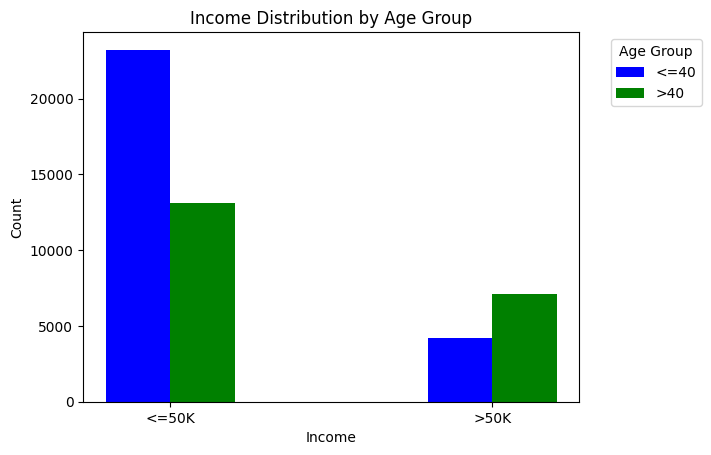

In [22]:
age_less_than_or_equal_forty = {'<=50K': 0, '>50K': 0}
age_greater_than_forty = {'<=50K': 0, '>50K': 0}

# Count occurrences of income within each age group
for age, income in zip(df['age'], df['income']):
    if age < 40:
        age_less_than_or_equal_forty[income] += 1
    elif age > 40:
        age_greater_than_forty[income] += 1

# Plotting the bar plot
plt.bar([0.8, 1.8], age_less_than_or_equal_forty.values(), width=0.2, label='<=40', color='blue')
plt.bar([1.0, 2.0], age_greater_than_forty.values(), width=0.2, label='>40', color='green')

# Adding labels and titles
plt.title('Income Distribution by Age Group')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks([.9, 1.9], ['<=50K', '>50K'])
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Plot Distribution by Education Group

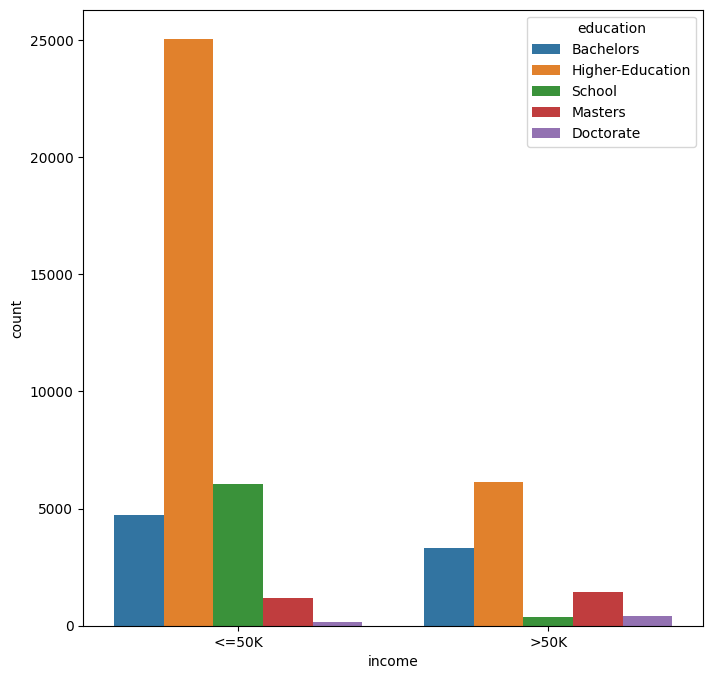

In [23]:
plt.figure(figsize=(8,8))
sns.countplot(x='income',hue='education',data=df)
plt.show()

## Plot Distribution by Work Class

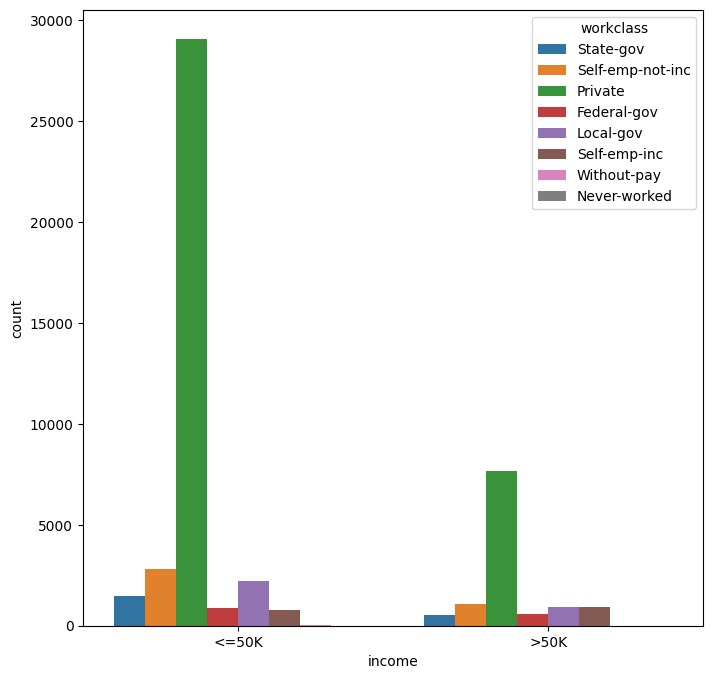

In [24]:
plt.figure(figsize=(8,8))
sns.countplot(x='income',hue='workclass',data=df)
plt.show()

## Plot Distribution by Occupation

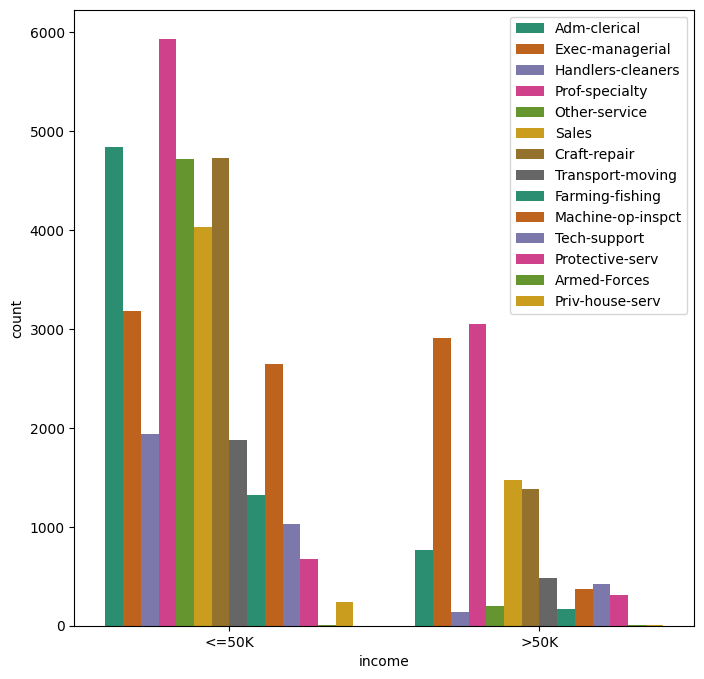

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(x='income',hue='occupation',data=df,palette='Dark2')
plt.legend(loc='best')
plt.show()

## Encode the categorical values

In [26]:
label_encoder = LabelEncoder()

df['workclass'] = label_encoder.fit_transform(df['workclass'])
mapping_workclass = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

mapping_education = {'School':0,'Higher-Education':1,'Bachelors':2,'Masters':3,'Doctorate':4}
df['education'] = df['education'].replace(mapping_education)

df['marital-status'] = label_encoder.fit_transform(df['marital-status'])
mapping_marital_status = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

df['occupation'] = label_encoder.fit_transform(df['occupation'])
mapping_occupation = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

df['native-country'] = label_encoder.fit_transform(df['native-country'])
mapping_country = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

mapping_income = {'<=50K':0,'>50K':1}
df['income'] = df['income'].replace(mapping_income)
inverse_mapping_income = {v: k for k, v in mapping_income.items()}


##Seperate X and y values
Split the dataset to train test

In [27]:
X = df.drop(columns='income')
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("No of train samples:",X_train.shape[0])
print("No of test samples:",X_test.shape[0])

No of train samples: 39073
No of test samples: 9769


## **RandomForest Model**

In [28]:
rfr_model = RandomForestClassifier(max_depth=12, random_state=42)
rfr_model.fit(X_train,y_train)

rfr_train_prediction = rfr_model.predict(X_train)
rfr_train_accuracy = accuracy_score(y_train,rfr_train_prediction)
print("Train Accuracy:", rfr_train_accuracy)

rfr_prediction = rfr_model.predict(X_test)
rfr_test_accuracy = accuracy_score(y_test,rfr_prediction)
print("Test Accuracy:", rfr_test_accuracy)

print(classification_report(y_test, rfr_prediction))

Train Accuracy: 0.8569344560182223
Test Accuracy: 0.8364213327873887
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7414
           1       0.72      0.52      0.61      2355

    accuracy                           0.84      9769
   macro avg       0.79      0.73      0.75      9769
weighted avg       0.83      0.84      0.83      9769



## Visualize train vs test accuracy for RandomForest

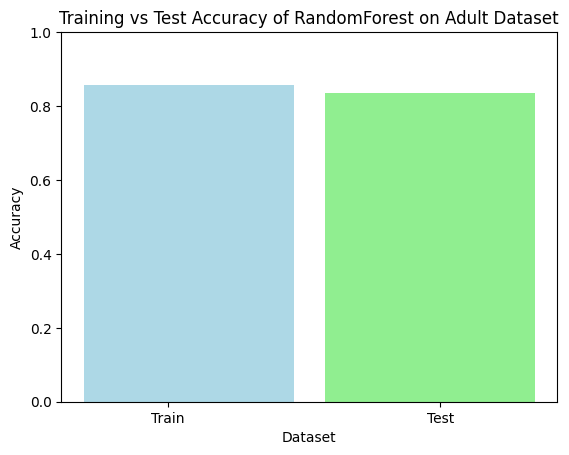

In [29]:
plt.bar([0.9, 1.13], [rfr_train_accuracy, rfr_test_accuracy], width=0.2, color=['lightblue', 'lightgreen'])
plt.title('Training vs Test Accuracy of RandomForest on Adult Dataset')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.xticks([.88, 1.14], ['Train', 'Test'])
plt.ylim(0, 1)
plt.show()

## **NaiveBayes Model**

In [30]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)

nb_train_prediction = nb_classifier.predict(X_train)
nb_train_accuracy = accuracy_score(y_train,nb_train_prediction)
print('Train Accuracy',nb_train_accuracy)

nb_test_prediction = nb_classifier.predict(X_test)
nb_test_accuracy = accuracy_score(y_test, nb_test_prediction)
print("Test Accuracy:", nb_test_accuracy)

print(classification_report(y_test, nb_test_prediction))

Train Accuracy 0.8033936477874747
Test Accuracy: 0.8035622888729655
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      7414
           1       0.63      0.45      0.53      2355

    accuracy                           0.80      9769
   macro avg       0.73      0.68      0.70      9769
weighted avg       0.79      0.80      0.79      9769



##Visualize train vs test accuracy for NaiveBayes

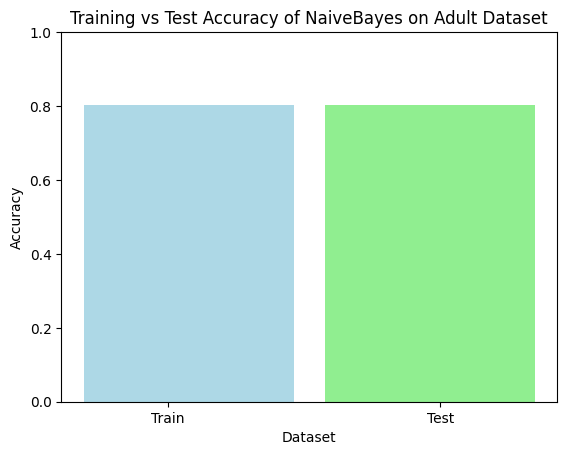

In [31]:
plt.bar([0.9, 1.13], [nb_train_accuracy, nb_test_accuracy], width=0.2, color=['lightblue', 'lightgreen'])
plt.title('Training vs Test Accuracy of NaiveBayes on Adult Dataset')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.xticks([.88, 1.14], ['Train', 'Test'])
plt.ylim(0, 1)
plt.show()

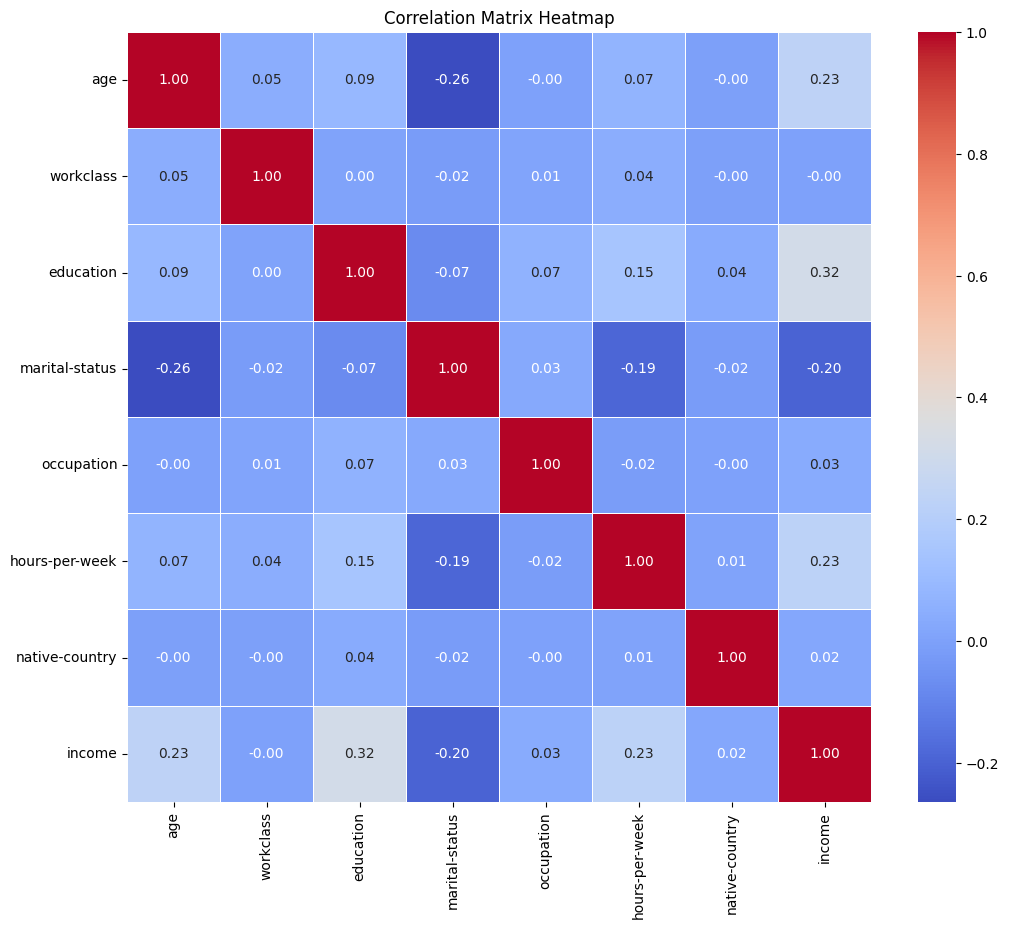

In [32]:
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## New sample testing

In [33]:
encoded_workclass = mapping_workclass.get('State-gov')
encoded_education = mapping_education.get('Bachelors')
encoded_marital = mapping_marital_status.get('Married-civ-spouse')
encoded_occupation = mapping_occupation.get('Prof-specialty')
encoded_country = mapping_country.get('Iran')

user_data1 = pd.DataFrame({
    'age' : 45,
    'workclass' : encoded_workclass,
    'education' : encoded_education,
    'marital-status' : encoded_marital,
    'occupation' : encoded_occupation,
    'hours-per-week' : 60,
    'native-country' : encoded_country
},index=[0])

user_data1_rfr = rfr_model.predict(user_data1)
user_data1_rfr = inverse_mapping_income.get(user_data1_rfr[0])

user_data1_nb = nb_classifier.predict(user_data1)
user_data1_nb = inverse_mapping_income.get(user_data1_nb[0])

print("Random Forset Prediction: Income is",user_data1_rfr)
print("Naive Bayes Prediction: Income is",user_data1_nb)

Random Forset Prediction: Income is >50K
Naive Bayes Prediction: Income is >50K


In [34]:
encoded_workclass = mapping_workclass.get('Private')
encoded_education = mapping_education.get('School')
encoded_marital = mapping_marital_status.get('Widowed')
encoded_occupation = mapping_occupation.get('Handlers-cleaners')
encoded_country = mapping_country.get('United-States')

user_data2 = pd.DataFrame({
    'age' : 53,
    'workclass' : encoded_workclass,
    'education' : encoded_education,
    'marital-status' : encoded_marital,
    'occupation' : encoded_occupation,
    'hours-per-week' : 40,
    'native-country' : encoded_country
},index=[0])

user_data2_rfr = rfr_model.predict(user_data2)
user_data2_rfr = inverse_mapping_income.get(user_data2_rfr[0])

user_data2_nb = nb_classifier.predict(user_data2)
user_data2_nb = inverse_mapping_income.get(user_data2_nb[0])

print("Random Forset Prediction: Income is",user_data2_rfr)
print("Naive Bayes Prediction: Income is",user_data2_nb)

Random Forset Prediction: Income is <=50K
Naive Bayes Prediction: Income is <=50K


In [35]:
encoded_workclass = mapping_workclass.get('Without-pay')
encoded_education = mapping_education.get('Higher-Education')
encoded_marital = mapping_marital_status.get('Widowed')
encoded_occupation = mapping_occupation.get('Sales')
encoded_country = mapping_country.get('Scotland')

user_data3 = pd.DataFrame({
    'age' : 35,
    'workclass' : encoded_workclass,
    'education' : encoded_education,
    'marital-status' : encoded_marital,
    'occupation' : encoded_occupation,
    'hours-per-week' : 55,
    'native-country' : encoded_country
},index=[0])

user_data3_rfr = rfr_model.predict(user_data3)
user_data3_rfr = inverse_mapping_income.get(user_data3_rfr[0])

user_data3_nb = nb_classifier.predict(user_data3)
user_data3_nb = inverse_mapping_income.get(user_data3_nb[0])

print("Random Forset Prediction: Income is",user_data3_rfr)
print("Naive Bayes Prediction: Income is",user_data3_nb)

Random Forset Prediction: Income is <=50K
Naive Bayes Prediction: Income is <=50K
